## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'].values, train_df['y_train'].values
x_train.shape

(500,)

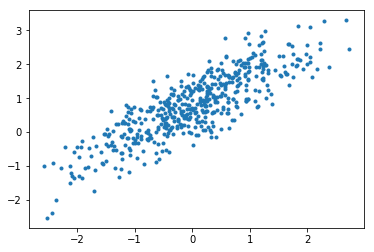

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
def training(iteration, learning_rate, theta):
    total_loss = []
    for iteration in range(n_iteration):
        y_pred_theta0 = []
        y_pred_theta1 = []
        loss = 0

        for i in range(len(x_train)):
            y_pred = theta[0] + theta[1] * x_train[i]
            y_pred_minus_true = y_pred - y_train[i]
            loss += y_pred_minus_true ** 2
            y_pred_theta0.append(y_pred_minus_true)
            y_pred_theta1.append(y_pred_minus_true * x_train[i])

        y_pred_theta0 = np.array(y_pred_theta0)
        partial_theta0 = np.sum(y_pred_theta0, axis=0) / len(x_train)
        y_pred_theta1 = np.array(y_pred_theta1)
        partial_theta1 = np.sum(y_pred_theta1, axis=0) / len(x_train)
        total_loss.append(loss)
        theta[0] = theta[0] - learning_rate * partial_theta0
        theta[1] = theta[1] - learning_rate * partial_theta1

        if iteration % 1000 == 0:
            print("Iteration = {}, loss = {}".format(iteration, loss))
    return theta, total_loss

In [6]:
n_iteration = 30000
learning_rate = 1e-4
sigma = 1
theta = np.random.normal(0, sigma, 2)
theta, total_loss = training(n_iteration, learning_rate, theta)
print(theta)

Iteration = 0, loss = 1888.7302616680058
Iteration = 1000, loss = 1575.7469860671206
Iteration = 2000, loss = 1318.6042749659046
Iteration = 3000, loss = 1107.334837429085
Iteration = 4000, loss = 933.7513212032136
Iteration = 5000, loss = 791.1283067602765
Iteration = 6000, loss = 673.9411433394378
Iteration = 7000, loss = 577.6514619568541
Iteration = 8000, loss = 498.53101902581517
Iteration = 9000, loss = 433.51701735920534
Iteration = 10000, loss = 380.0932772136314
Iteration = 11000, loss = 336.1926365338898
Iteration = 12000, loss = 300.1167859487862
Iteration = 13000, loss = 270.47042259908676
Iteration = 14000, loss = 246.10716401472274
Iteration = 15000, loss = 226.0851207296128
Iteration = 16000, loss = 209.6304019660856
Iteration = 17000, loss = 196.10713718033045
Iteration = 18000, loss = 184.99284955718232
Iteration = 19000, loss = 175.85822554647117
Iteration = 20000, loss = 168.35049534695247
Iteration = 21000, loss = 162.17977952004182
Iteration = 22000, loss = 157.107

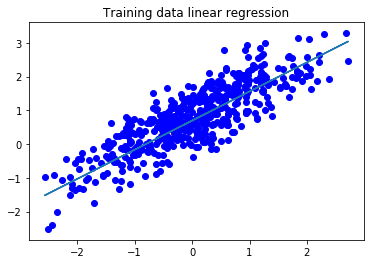

In [7]:
fig = plt.figure()
plt.title("Training data linear regression")
plt.scatter(x_train, y_train, c='blue')
predict_func = np.poly1d(np.flip(theta))
y_train_pred = predict_func(x_train)
plt.plot(x_train, y_train_pred)

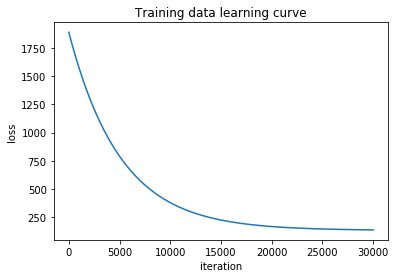

In [8]:
fig = plt.figure()
plt.title("Training data learning curve")
iterations = [_ for _ in range(n_iteration)]
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(iterations, total_loss)

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [9]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [10]:
def model(x, theta):
    y_pred = []
    for i in range(len(x)):
        y_pred.append(theta[0] + theta[1] * x[i])
    return y_pred

In [11]:
y_pred = model(x_test, theta)

In [12]:
def MSE(y_pred, y_test):
    error = 0
    for i in range(len(y_pred)):
        error += (y_pred[i] - y_test[i]) ** 2
    error /= len(y_pred)
    return error

In [13]:
mse = MSE(y_pred, y_test)
print("MSE error = {}".format(mse))

MSE error = 0.06705053376813024


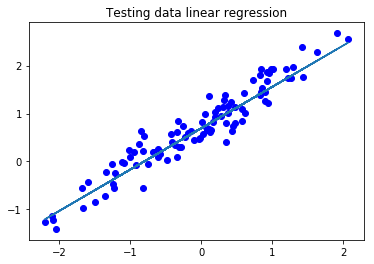

In [14]:
fig = plt.figure()
plt.title("Testing data linear regression")
plt.scatter(x_test, y_test, c='blue')
predict_func = np.poly1d(np.flip(theta))
y_test_pred = predict_func(x_test)
plt.plot(x_test, y_test_pred)